In [1]:
# Import libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# importing the data set

orders = pd.read_csv("restaurant-2-orders.csv")

In [3]:
orders

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products
0,25583,03/08/2019 21:58,Tandoori Mixed Grill,1,11.95,12
1,25583,03/08/2019 21:58,Madras Sauce,1,3.95,12
2,25583,03/08/2019 21:58,Mushroom Rice,2,3.95,12
3,25583,03/08/2019 21:58,Garlic Naan,1,2.95,12
4,25583,03/08/2019 21:58,Paratha,1,2.95,12
...,...,...,...,...,...,...
119178,8144,13/02/2017 12:59,House Red wine 75cl,1,17.95,18
119179,7463,03/01/2017 19:13,House white wine 75cl,1,17.95,6
119180,6719,24/11/2016 18:35,House Red wine 75cl,1,17.95,6
119181,5251,21/08/2016 17:55,House white wine 75cl,1,17.95,9


In [4]:
orders.head(10)

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products
0,25583,03/08/2019 21:58,Tandoori Mixed Grill,1,11.95,12
1,25583,03/08/2019 21:58,Madras Sauce,1,3.95,12
2,25583,03/08/2019 21:58,Mushroom Rice,2,3.95,12
3,25583,03/08/2019 21:58,Garlic Naan,1,2.95,12
4,25583,03/08/2019 21:58,Paratha,1,2.95,12
5,25583,03/08/2019 21:58,Plain Rice,1,2.95,12
6,25583,03/08/2019 21:58,Prawn Puree,1,4.95,12
7,25583,03/08/2019 21:58,Plain Papadum,1,0.80,12
8,25583,03/08/2019 21:58,Mango Chutney,2,0.50,12
9,25583,03/08/2019 21:58,Onion Chutney,1,0.50,12


In [5]:
# Renaming and removing commas in the cost column 
orders = orders.rename({"Order ID": "OrderID"}, axis=1)
orders = orders.rename({"Order Date": "OrderDate"}, axis=1)
orders = orders.rename({"Item Name": "ItemName"}, axis=1)
orders = orders.rename({"Product Price": "ProductPrice"}, axis=1)
orders = orders.rename({"Total products": "TotalProducts"}, axis=1)

In [6]:
orders

,OrderID,OrderDate,ItemName,Quantity,ProductPrice,TotalProducts
0,25583,03/08/2019 21:58,Tandoori Mixed Grill,1,11.95,12
1,25583,03/08/2019 21:58,Madras Sauce,1,3.95,12
2,25583,03/08/2019 21:58,Mushroom Rice,2,3.95,12
3,25583,03/08/2019 21:58,Garlic Naan,1,2.95,12
4,25583,03/08/2019 21:58,Paratha,1,2.95,12
...,...,...,...,...,...,...
119178,8144,13/02/2017 12:59,House Red wine 75cl,1,17.95,18
119179,7463,03/01/2017 19:13,House white wine 75cl,1,17.95,6
119180,6719,24/11/2016 18:35,House Red wine 75cl,1,17.95,6
119181,5251,21/08/2016 17:55,House white wine 75cl,1,17.95,9


In [7]:
Ser = orders.groupby('OrderID').ItemName.nunique()
Ser.describe()

count    19658.000000
mean         6.048835
std          2.670403
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         29.000000
Name: ItemName, dtype: float64

Text(0, 0.5, 'No. of transactions')

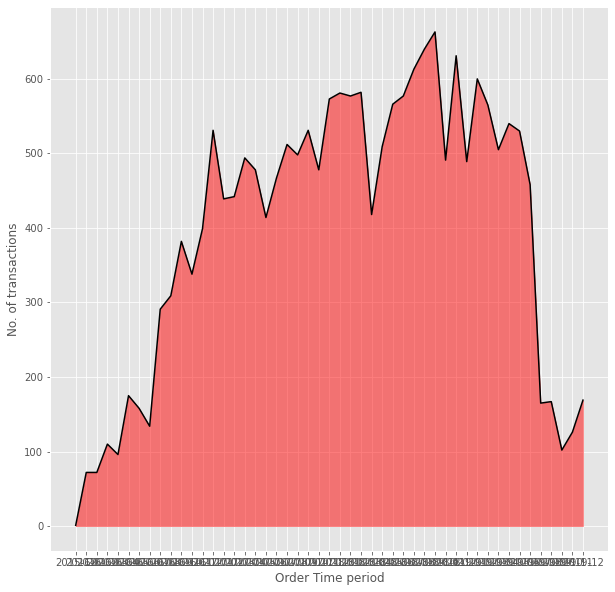

In [8]:
from matplotlib import style

orders.OrderDate = pd.to_datetime(orders.OrderDate)
orders['month_year']= pd.to_datetime(orders.OrderDate).dt.to_period('M')
orders.sort_values(by = ['month_year'], inplace = True)
Ser = orders.groupby('month_year').OrderID.nunique()
x = np.arange(0,len(Ser),1)
style.use('ggplot')
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.plot(x, Ser, color = 'k')
ax1.fill_between(x, Ser, color = 'r', alpha = 0.5)
ax1.set_xticks(x)
ax1.set_xticklabels(Ser.index)
plt.xlabel('Order Time period')
plt.ylabel('No. of transactions')

<BarContainer object of 10 artists>

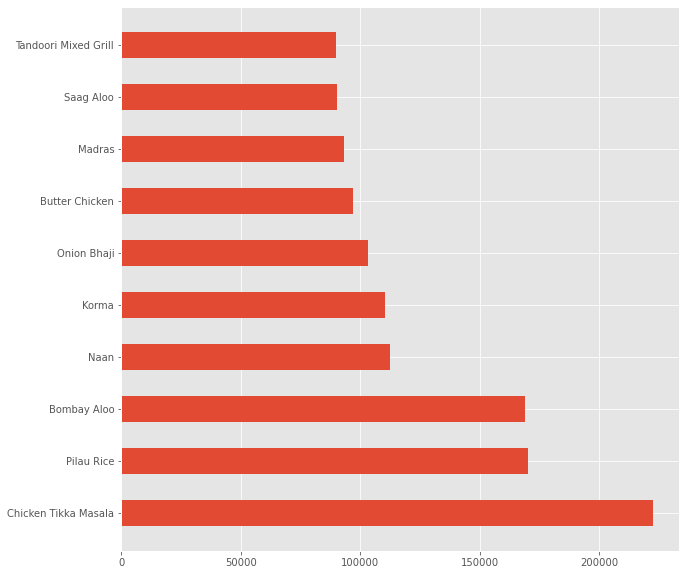

In [9]:
# most selling item

orders['total_cost_item'] = orders.TotalProducts*orders.ProductPrice
Ser = orders.groupby('ItemName').total_cost_item.sum()
Ser.sort_values(ascending = False, inplace = True)
Ser = Ser[:10]
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.barh(Ser.index, Ser, height = 0.5)

In [10]:
# Minimum support

min_support = 0.05

In [11]:
metric = "confidence"  # confidence is used as metric
min_threshold_for_metric = 0.2 
number_rules_to_visualize = 3  # for the grouped bar chart

# Transform the data

In [12]:
basket = (
    # group data (item name should be grouped in order to unstack later)
    orders.groupby([
        'OrderID', 'ItemName'
    ])['Quantity'].sum()  # Agregate quantity data just to apply unstack, the value doesnt change
    .unstack().reset_index()  # Transform to 1 transaction per row
    .fillna(0)  # fill the products that its not in the order with 0
    .set_index('OrderID')  # set the order number as index
)

print("One order per row with the quantity of each product")
basket.head()

One order per row with the quantity of each product


ItemName,Achar Chicken,Achar Lamb,Aloo Brinjal,Aloo Chaat,Aloo Dupiaza,Aloo Gobi,Aloo Mithy,Aloo Peas,Bangon Hari Mirch,Bhindi Bhajee,...,Vindaloo - Chicken Tikka,Vindaloo - King Prawn,Vindaloo - Lamb,Vindaloo - Prawn,Vindaloo - chicken,Vindaloo - chicken-tikka,Vindaloo - king-prawn,Vindaloo - lamb,Vindaloo - prawn,Vindaloo Sauce
OrderID,,,,,,,,,,,,,,,,,,,,,
2096,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# converting to boolean

basket_boolean_set = basket.applymap(lambda quantity: 1 if int(quantity) >= 1 else 0)

print("Converted quantity to boolean values")
basket_boolean_set.head()

Converted quantity to boolean values


ItemName,Achar Chicken,Achar Lamb,Aloo Brinjal,Aloo Chaat,Aloo Dupiaza,Aloo Gobi,Aloo Mithy,Aloo Peas,Bangon Hari Mirch,Bhindi Bhajee,...,Vindaloo - Chicken Tikka,Vindaloo - King Prawn,Vindaloo - Lamb,Vindaloo - Prawn,Vindaloo - chicken,Vindaloo - chicken-tikka,Vindaloo - king-prawn,Vindaloo - lamb,Vindaloo - prawn,Vindaloo Sauce
OrderID,,,,,,,,,,,,,,,,,,,,,
2096,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Generate frequent itemsets with Apriori

In [14]:
# Applying apriori to generate frequent item sets

frequent_itemsets = apriori(basket_boolean_set, min_support=min_support, use_colnames=True)

print("\nFrequent itemsets using apriori and minimun support equals to %.2f percent" % (min_support*100))
frequent_itemsets.head(10)


Frequent itemsets using apriori and minimun support equals to 5.00 percent


,support,itemsets
0,0.209991,(Bombay Aloo)
1,0.077068,(Butter Chicken)
2,0.068115,(Chapati)
3,0.051226,(Chicken Tikka)
4,0.066487,(Chicken Tikka (Main))
5,0.177383,(Chicken Tikka Masala)
6,0.051124,(Curry)
7,0.199410,(Garlic Naan)
8,0.125293,(Keema Naan)
9,0.083834,(Korma)


# Generate Association rules

In [15]:
# Association rule
rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold_for_metric)

In [16]:
rules.drop(['antecedent support','consequent support'], axis=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bombay Aloo),(Naan),0.209991,0.339760,0.094974,0.452277,1.331167,0.023628,1.205427
1,(Naan),(Bombay Aloo),0.339760,0.209991,0.094974,0.279533,1.331167,0.023628,1.096524
2,(Pilau Rice),(Bombay Aloo),0.425781,0.209991,0.112219,0.263560,1.255104,0.022809,1.072741
3,(Bombay Aloo),(Pilau Rice),0.209991,0.425781,0.112219,0.534399,1.255104,0.022809,1.233286
4,(Bombay Aloo),(Plain Papadum),0.209991,0.327144,0.080578,0.383721,1.172941,0.011881,1.091804
...,...,...,...,...,...,...,...,...,...
73,"(Pilau Rice, Plain Papadum)",(Naan),0.164920,0.339760,0.075440,0.457434,1.346344,0.019407,1.216884
74,"(Naan, Plain Papadum)",(Pilau Rice),0.126666,0.425781,0.075440,0.595582,1.398800,0.021508,1.419867
75,"(Pilau Rice, Naan)",(Plain Papadum),0.178045,0.327144,0.075440,0.423714,1.295191,0.017194,1.167573
76,(Plain Papadum),"(Pilau Rice, Naan)",0.327144,0.178045,0.075440,0.230602,1.295191,0.017194,1.068310


In [17]:
# formatting the values to proper decimal value

rules['antecedents'] = rules['antecedents'].apply(lambda frozen_set: str(set(frozen_set))) # makes antecedent unchangeable
rules['consequents'] = rules['consequents'].apply(lambda frozen_set: str(set(frozen_set))) # makes consequents unchangeable
rules['support'] = rules['support'].apply(lambda value: round(value, 2))
rules['confidence'] = rules['confidence'].apply(lambda value: round(value, 2))
rules['lift'] = rules['lift'].apply(lambda value: round(value, 2))
rules['leverage'] = rules['leverage'].apply(lambda value: round(value, 2))
rules['conviction'] = rules['conviction'].apply(lambda value: round(value, 2))

In [18]:
# Printing the rules generated

print("Rules using the metric '%s' with a minimun threshold of %s equals to %.2f " % (metric, metric, min_threshold_for_metric))
rules = rules.drop(['antecedent support','consequent support'], axis=1)
rules

Rules using the metric 'confidence' with a minimun threshold of confidence equals to 0.20 


,antecedents,consequents,support,confidence,lift,leverage,conviction
0,{'Bombay Aloo'},{'Naan'},0.09,0.45,1.33,0.02,1.21
1,{'Naan'},{'Bombay Aloo'},0.09,0.28,1.33,0.02,1.10
2,{'Pilau Rice'},{'Bombay Aloo'},0.11,0.26,1.26,0.02,1.07
3,{'Bombay Aloo'},{'Pilau Rice'},0.11,0.53,1.26,0.02,1.23
4,{'Bombay Aloo'},{'Plain Papadum'},0.08,0.38,1.17,0.01,1.09
...,...,...,...,...,...,...,...
73,"{'Pilau Rice', 'Plain Papadum'}",{'Naan'},0.08,0.46,1.35,0.02,1.22
74,"{'Naan', 'Plain Papadum'}",{'Pilau Rice'},0.08,0.60,1.40,0.02,1.42
75,"{'Pilau Rice', 'Naan'}",{'Plain Papadum'},0.08,0.42,1.30,0.02,1.17
76,{'Plain Papadum'},"{'Pilau Rice', 'Naan'}",0.08,0.23,1.30,0.02,1.07


C:\Users\Shahd\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Text(0, 0.5, 'Support')

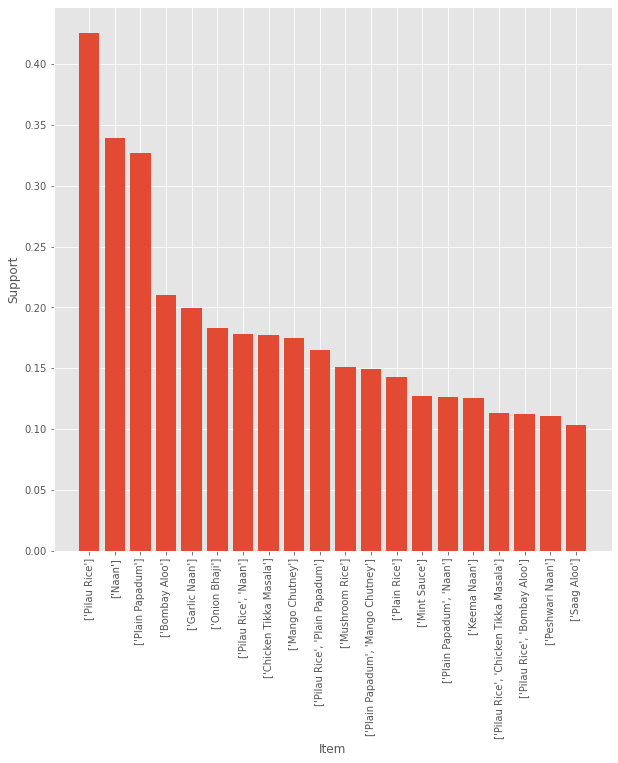

In [19]:
# plotting support and items

top_items = frequent_itemsets.sort_values('support', ascending = False)[:20]
for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(top_items.itemsets, top_items.support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel('Item')
plt.ylabel('Support')

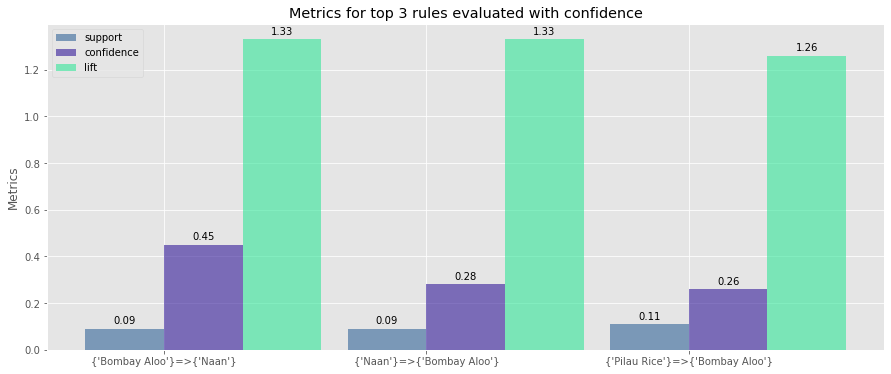

In [20]:
# Visualizing using bar chart

rules_top = rules.iloc[0:number_rules_to_visualize, :]
labels = ["=>".join(rule) for rule in rules_top.iloc[:, 0:2 ].values]  # format {set1} => {set2} for labels
x = np.arange(len(labels))  # the label locations
width = 0.3
fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.bar(x - width/2, rules_top['support'].values, width, label='support',color=(0.2, 0.4, 0.6, 0.6))
rects2 = ax.bar(x + width/2, rules_top['confidence'].values, width, label='confidence',color=(0.2, 0.1, 0.6, 0.6) )
rects3 = ax.bar(x + width*1.5, rules_top['lift'].values, width, label='lift',color=(0.2, 0.9, 0.6, 0.6) )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metrics')
ax.set_title('Metrics for top ' + str(number_rules_to_visualize) + ' rules evaluated with ' + metric)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

mng = plt.get_current_fig_manager()
plt.show()

'for p in pos:\n    pos[p][1] += 0.07\nnx.draw_networkx_labels(G1, pos)'

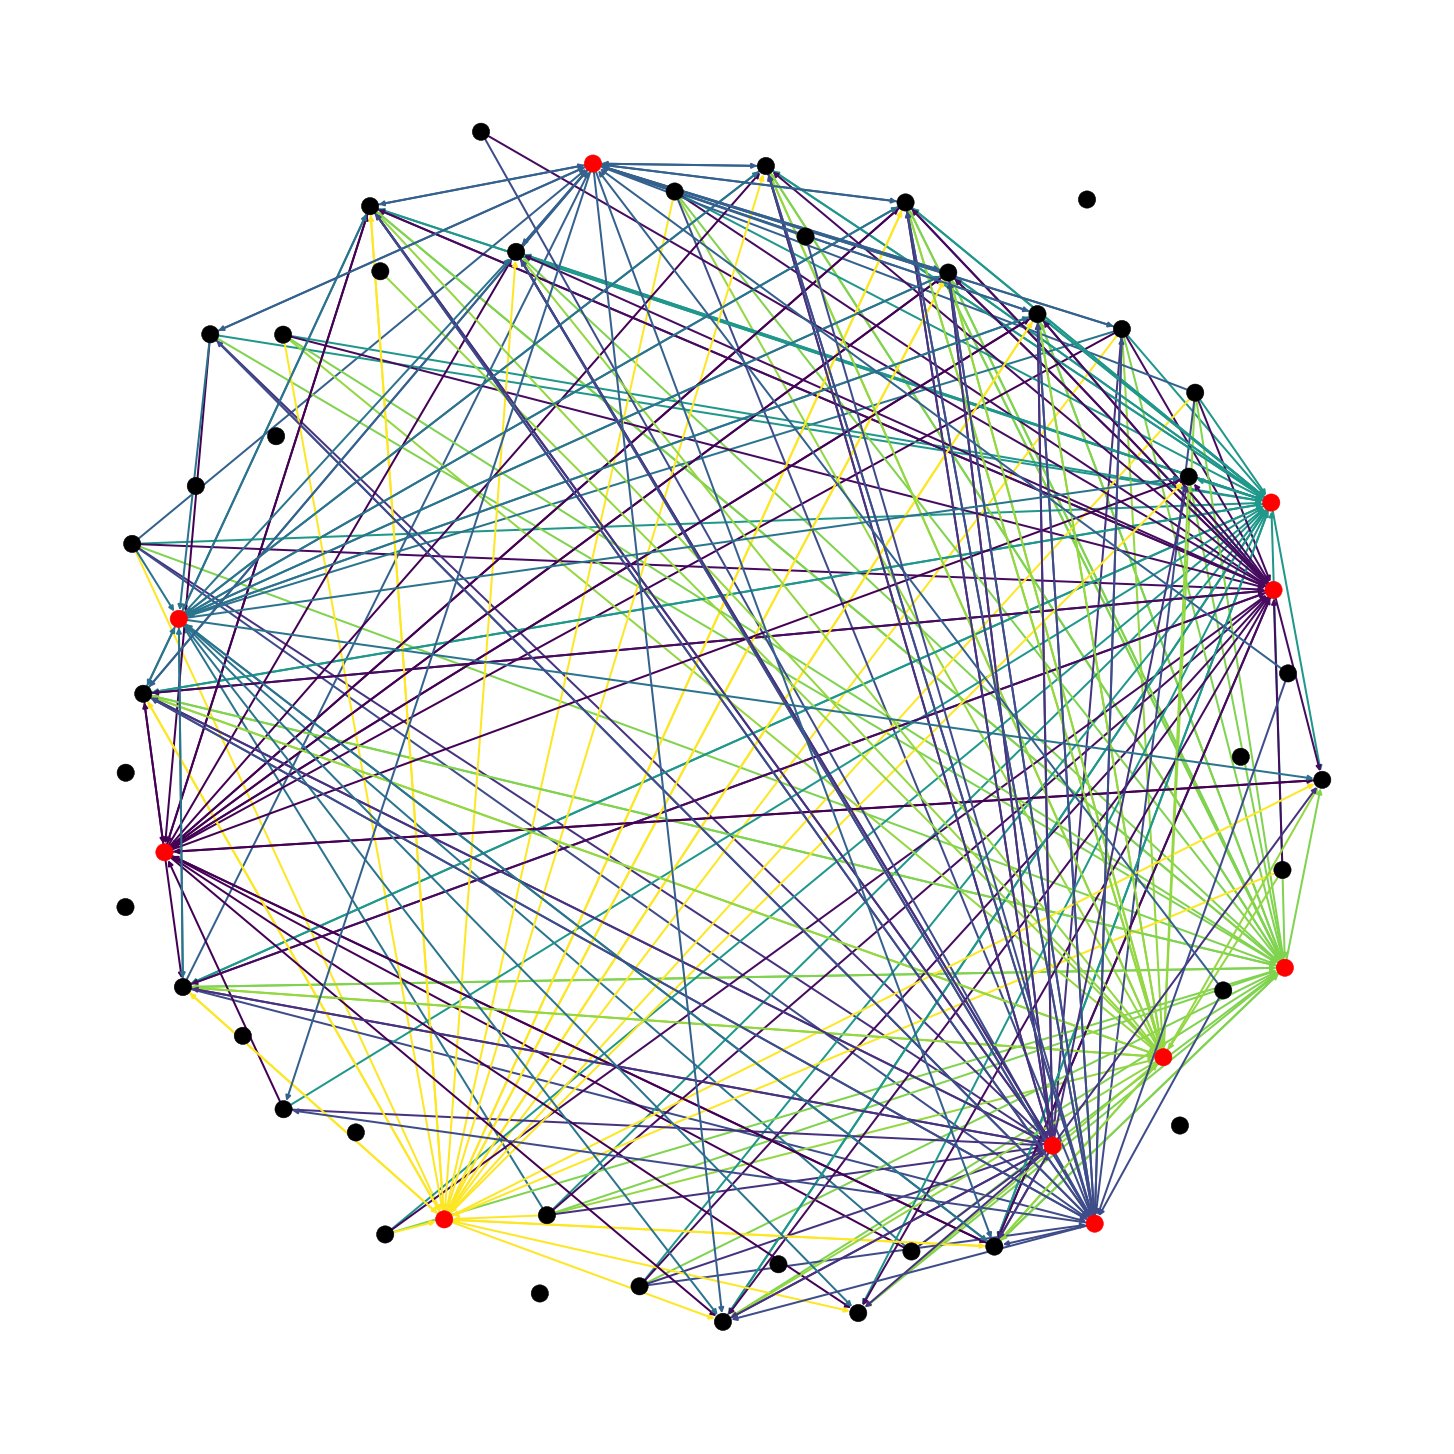

In [50]:
import networkx as nx

top_rules = rules.sort_values('confidence', ascending = False)[:10]
G1 = nx.DiGraph()

color_map = []
N = 50
colors = np.random.rand(N)
strs = ['r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9']
for i in range(10):
    G1.add_nodes_from('r'+str(i))
    for a in top_rules.iloc[i]['antecedents']:
        G1.add_nodes_from([a])
        G1.add_edge(a, 'r'+str(i), color = colors[i], weight = 2)
    for c in top_rules.iloc[i]['consequents']:
        G1.add_nodes_from([c])
        G1.add_edge('r'+str(i), c, color = colors[i], weight = 2)
        
for node in G1:
    found_a_string = False
    for item in strs:
        if node == item:
            found_a_string = True
    if found_a_string:
        color_map.append('red')
    else:
        color_map.append('black')
        
edges = G1.edges()
colors = [G1[u][v]['color'] for u,v in edges]
weights = [G1[u][v]['weight'] for u,v in edges]
pos = nx.spring_layout(G1, k = 16, scale = 1)
fig = plt.figure(figsize = (20,20))
nx.draw(G1, pos, node_color = color_map, edge_color = colors, width = weights, font_size = 16, with_labels = False)
#nx.draw_networkx_edge_labels(G1, pos, edge_labels = edges)

'''for p in pos:
    pos[p][1] += 0.07
nx.draw_networkx_labels(G1, pos)'''